In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
from scipy.optimize import curve_fit
from scipy.integrate import odeint, quad, simps
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
fluos_mario = pd.read_csv('datasets/marionette_fluo.csv', index_col='time')
ods_mario = pd.read_csv('datasets/marionette_od.csv', index_col='time')
fluos_top10 = pd.read_csv('datasets/top10_fluo.csv', index_col='time')
ods_top10 = pd.read_csv('datasets/top10_od.csv', index_col='time')
gates = fluos_mario[0].columns.tolist()

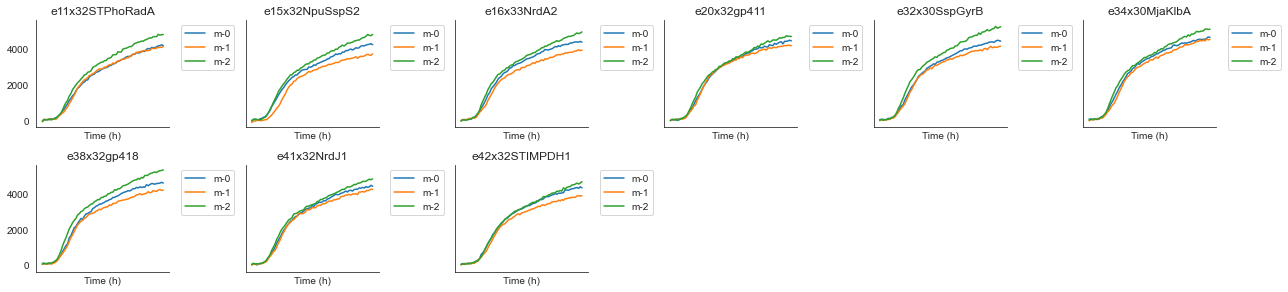

In [3]:
def plot_data(data, name, cols, num_row, num_col, include_on=True, datab=None):
    
    r = 4 if include_on else 3
    f, axs = plt.subplots(num_row, num_col, sharex=True, sharey=True, figsize=(num_col*3, num_row*2))
    axr = axs.ravel()
    for i, ax in enumerate(axr):
        if i < len(cols):
            for j in range(r):
                ax.plot(data[j].index/60, data[j][cols[i]], label=name+str(j))
                if datab is not None:
                    ax.plot(datab[j].index/60, datab[j][cols[i]], label='t-'+str(j))
            ax.set_title(cols[i])
            ax.set_xlabel('Time (h)')
            ax.legend(bbox_to_anchor=(1.05, 1), loc='best')
        else:
            ax.set_visible(False)
    plt.tight_layout()
    sns.despine()
    
#plot bulk fluorescence data
plot_data(fluos_mario, 'm-', gates, 4, 6, False)

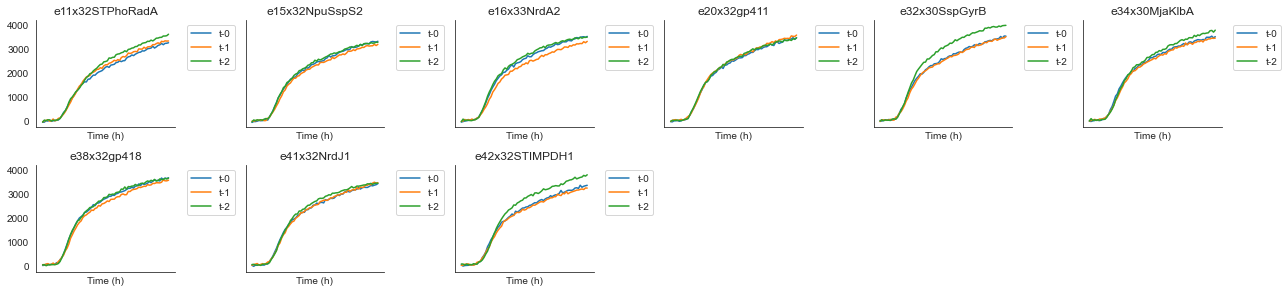

In [4]:
plot_data(fluos_top10, 't-', gates, 4, 6, False)

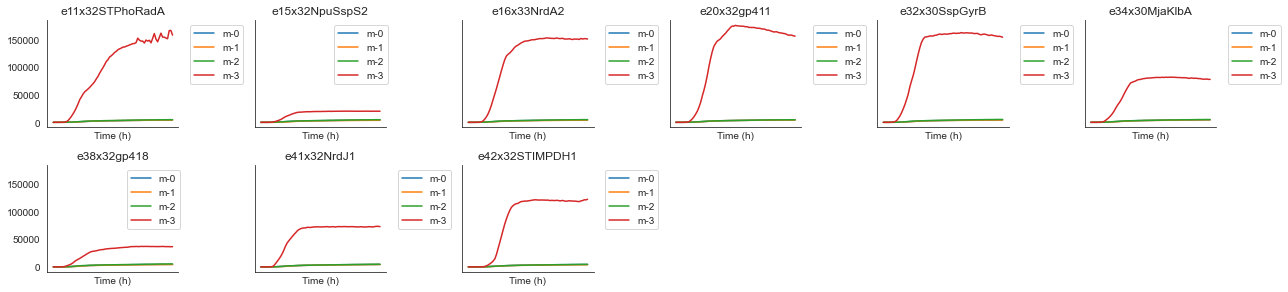

In [5]:
plot_data(fluos_mario, 'm-', gates, 4, 6)

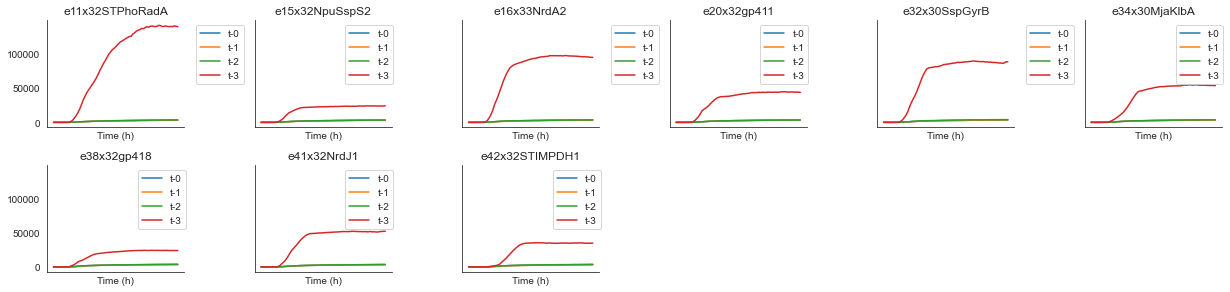

In [6]:
plot_data(fluos_top10, 't-', gates, 4, 6)

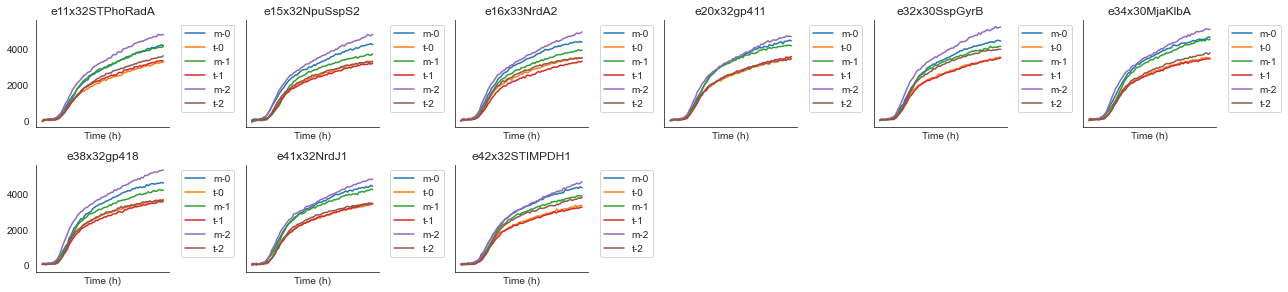

In [7]:
plot_data(fluos_mario, 'm-', gates, 4, 6, False, fluos_top10)

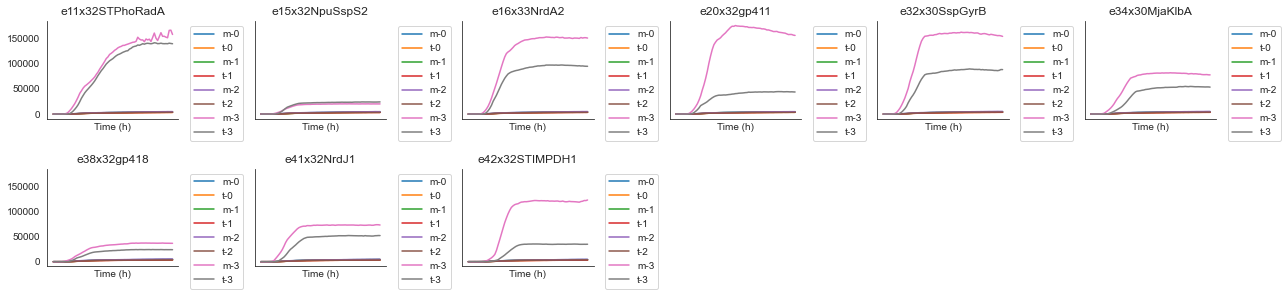

In [8]:
plot_data(fluos_mario, 'm-', gates, 4, 6, True, fluos_top10)

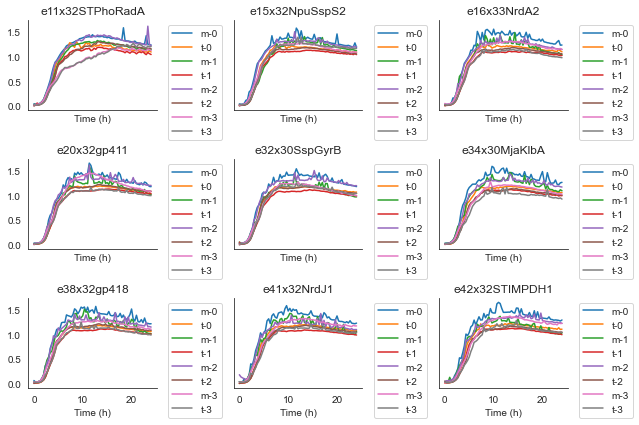

In [9]:
plot_data(ods_mario, 'm-', gates, 3, 3, True, ods_top10)

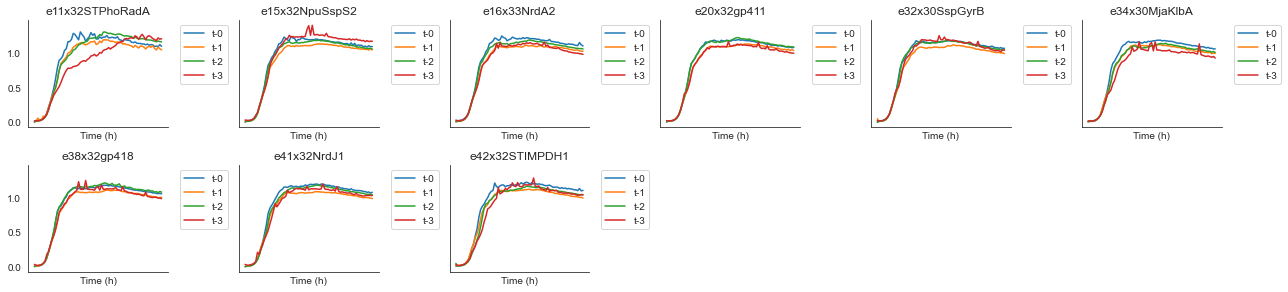

In [10]:
plot_data(ods_top10, 't-', gates, 4, 6, True)